In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
import shutil
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import models
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import preprocessing
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
from tensorflow.keras.layers import Layer
from tensorflow.keras import Model
from IPython.display import Image, display
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras import backend as K
import matplotlib.cm as cm
from IPython.display import Image
%matplotlib inline

In [8]:
# PROBLEM 1
# Paths to images
sky_path = './cloudy_sky.jpg'
eagle_path = './eagle.jpg'

# Read images
sky = cv2.imread(sky_path, 1)  
eagle = cv2.imread(eagle_path, 1) 

# Show the resulting image
# This is commented out so that the output is more clear in the html version
# cv2.imshow('image', img) 
# Wait for a key 
# cv2.waitKey(0) 
# Distroy all the window open 
# cv2.distroyAllWindows() 
# I did the same for the subtracted image but did not include so as to unclutter the comment sections
  
# Blending images
# I tried five different blending weights and ended up on this.
sky_eagle = cv2.addWeighted(sky, 0.35, eagle, 0.65, 0) 
# Define filepath for resulting image
cv2.imwrite('./sky_eagle.jpg', sky_eagle)
# The resulting image and can be found here

sky_eagle_subtract = cv2.subtract(eagle,sky)
cv2.imwrite('./sky_eagle_subtract.jpg', sky_eagle_subtract)

True

In [9]:
# PROBLEM 2
# Using code from the assignment, adding small tweaks.

# Get all indexes for number of images
all_ind = [i for i in range(12500)]
# Shuffle all indexes to make selection random
random.shuffle(all_ind)
# Define index splits
first = all_ind[:1000]
second = all_ind[1000:1500]
third = all_ind[1500:2000]

# The path to the directory where the original dataset was uncompressed
original_dataset_dir = 'dogs-vs-cats//train'

# The directory where we will store our smaller dataset
base_dir = 'cats_and_dogs_small'
# If dir exists, delete it - this confirms that there will be no possible extraneous files between executions of this cell
if os.path.exists(base_dir) and os.path.isdir(base_dir):
    shutil.rmtree(base_dir)
# Make dir
os.mkdir(base_dir)

# Directories for our training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in first]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in second]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in third]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in first]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in second]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in third]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
# PROBLEM 2 - Continued
# Define model according to specifications, using code from 5.2 notebook
model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['acc'])

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
# PROBLEM 2 - Continued
steps_epoch = 100
epochs = 30
steps_val = 50
# Using fit, rather than fit_generator, as fit_generator is deprecated
history = model.fit(
      train_generator,
      steps_per_epoch=steps_epoch,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=steps_val)

Epoch 1/30
100/100 [==============================] - 35s 348ms/step - loss: 0.6943 - acc: 0.5250 - val_loss: 0.6756 - val_acc: 0.6250
Epoch 2/30
100/100 [==============================] - 33s 327ms/step - loss: 0.6653 - acc: 0.5895 - val_loss: 0.6537 - val_acc: 0.5930
Epoch 3/30
100/100 [==============================] - 33s 332ms/step - loss: 0.6231 - acc: 0.6585 - val_loss: 0.6209 - val_acc: 0.6380
Epoch 4/30
100/100 [==============================] - 33s 330ms/step - loss: 0.5889 - acc: 0.6825 - val_loss: 0.5678 - val_acc: 0.7050
Epoch 5/30
100/100 [==============================] - 34s 343ms/step - loss: 0.5534 - acc: 0.7105 - val_loss: 0.5739 - val_acc: 0.6930
Epoch 6/30
100/100 [==============================] - 34s 335ms/step - loss: 0.5180 - acc: 0.7270 - val_loss: 0.5580 - val_acc: 0.7120
Epoch 7/30
100/100 [==============================] - 33s 329ms/step - loss: 0.4931 - acc: 0.7695 - val_loss: 0.6068 - val_acc: 0.6960
Epoch 8/30
100/100 [==============================] - 3

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: cats_and_dogs_small_1/assets


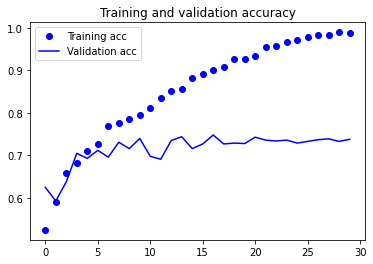

In [12]:
# PROBLEM 2 - Continued
# Get accuracy and val accuracy, plot against number of epochs
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
# Add title and legend
plt.title('Training and validation accuracy')
plt.legend()
# This plot shows that it is severely overfitting. But we're going to save it and use it anyway.
# Save model using tf format
model.save('cats_and_dogs_small_1', save_format='tf')

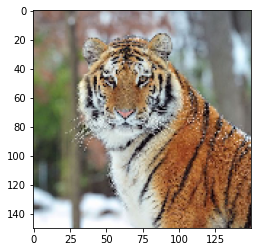

In [21]:
# PROBLEM 3
# Load previously saved model
model = load_model('./cats_and_dogs_small_1')

# This shows how to resize the image using cv2, but this is unecessary because we are loading an image with tf
# I am including to satisfy the requirements of the assignment
tiger_path = './tiger.jpg'
# tiger_big = cv2.imread(tiger_path)
# img = cv2.resize(tiger_big,(150,150))
img_width = 150
img_height = 150
# Not loading with tf, according to assignment instructions
img = preprocessing.image.load_img(tiger_path, target_size=(img_height, img_width))
img_tensor = preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.
plt.imshow(img_tensor[0])

<Figure size 432x288 with 0 Axes>

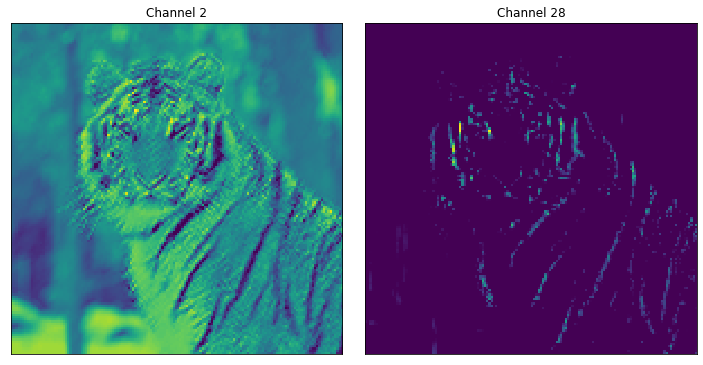

In [14]:
# PROBLEM 3 - Continued
# Using code from Chollet book
# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]

# Clear any previous plots
plt.clf()
# Define indexes
index_one = 2
index_two = 28
# Use subplots to get plots side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
ax1.matshow(first_layer_activation[0, :, :, index_one], cmap='viridis')
# Remove ticks and set title
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title(f'Channel {index_one}')

ax2.matshow(first_layer_activation[0, :, :, index_two], cmap='viridis')
# Remove ticks and set title
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title(f'Channel {index_two}')
fig.tight_layout()

<Figure size 432x288 with 0 Axes>

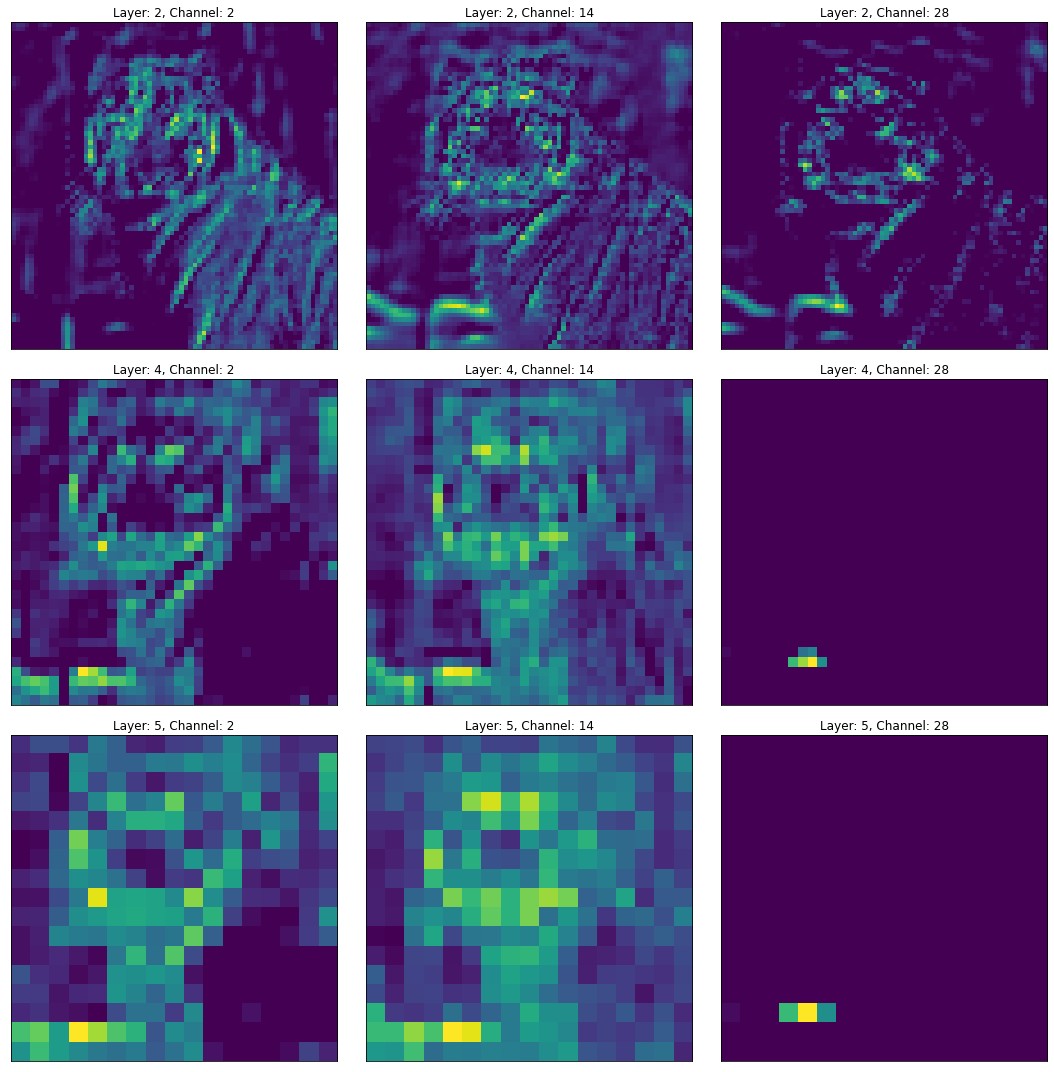

In [22]:
# PROBLEM 3 - Continued
# Clear layers
plt.clf()
# Layers at indexes 2,4 are conv2d
# Layer at index 5 are maxpooling
# As specified by the assignment
layer_indexes = [2, 4, 5]
# The assignment did not specify which activation indexes to use so I am choosing the previous two, and adding 14
activation_indexes = [2, 14, 28]

# Create figure and axes for plotting in for loop of layer and acivation indexes
fig, axes = plt.subplots(ncols=len(layer_indexes), nrows=len(activation_indexes), figsize=(15,15))
for i, lay_index in enumerate(layer_indexes):
    layer_activation = activations[lay_index]
    # Use subplots to get plots side by side
    for j, act_index in enumerate(activation_indexes):
        ax = axes[i][j]
        # Plot layer activation by channel
        ax.matshow(layer_activation[0, :, :, act_index], cmap='viridis')
        # Remove ticks and set title
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f'Layer: {lay_index}, Channel: {act_index}')
fig.tight_layout()

<Figure size 432x288 with 0 Axes>

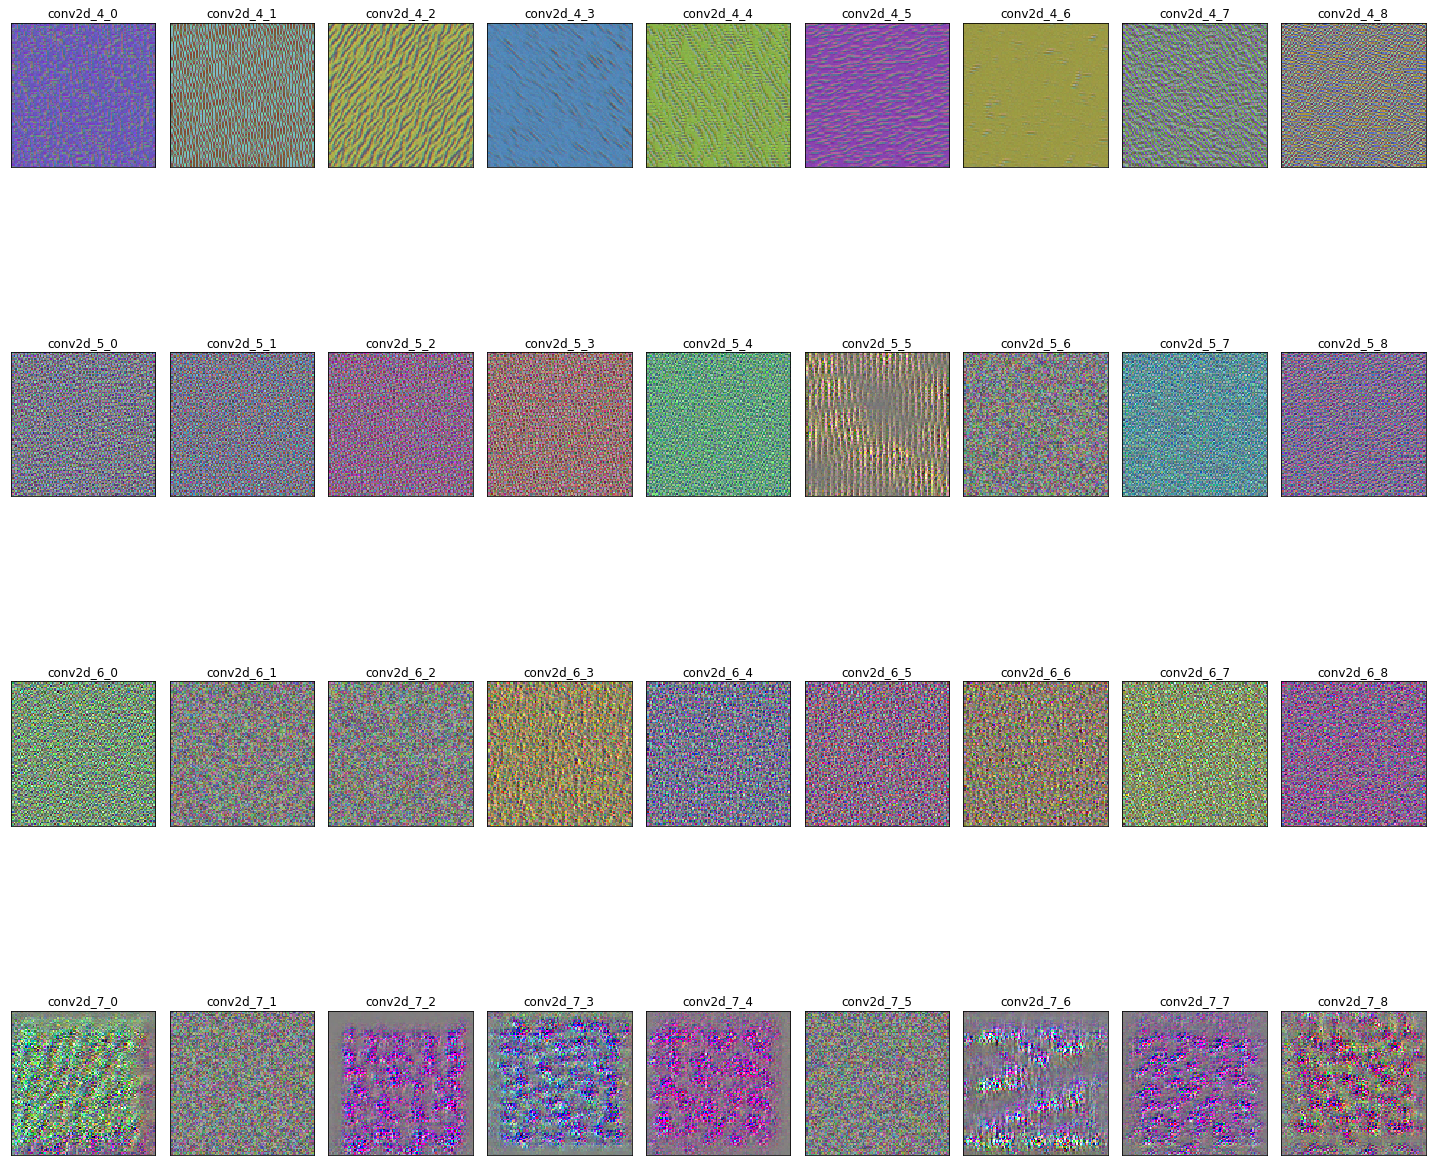

In [27]:
# PROBLEM 4
# Using code from Chollet notebook
# But modify with feature extractor param

model = load_model('./cats_and_dogs_small_1')

def compute_loss(input_image, filter_index, feature_extractor):
    activation = feature_extractor(input_image)
    # We avoid border artifacts by only involving non-border pixels in the loss.
    filter_activation = activation[:, 2:-2, 2:-2, filter_index]
    return tf.reduce_mean(filter_activation)

@tf.function
def gradient_ascent_step(img, filter_index, learning_rate, feature_extractor):
    with tf.GradientTape() as tape:
        tape.watch(img)
        loss = compute_loss(img, filter_index, feature_extractor)
    # Compute gradients.
    grads = tape.gradient(loss, img)
    # Normalize gradients.
    grads = tf.math.l2_normalize(grads)
    img += learning_rate * grads
    return loss, img

def initialize_image():
    # We start from a gray image with some random noise
    img = tf.random.uniform((1, img_width, img_height, 3))
    # ResNet50V2 expects inputs in the range [-1, +1].
    # Here we scale our random inputs to [-0.125, +0.125]
    return (img - 0.5) * 0.25


def visualize_filter(filter_index, feature_extractor):
    # We run gradient ascent for 20 steps
    iterations = 30
    learning_rate = 10.0
    img = initialize_image()
    for iteration in range(iterations):
        loss, img = gradient_ascent_step(img, filter_index, learning_rate, feature_extractor)

    # Decode the resulting input image
    img = deprocess_image(img[0].numpy())
    return loss, img


def deprocess_image(img):
    # Normalize array: center on 0., ensure variance is 0.15
    img -= img.mean()
    img /= img.std() + 1e-5
    img *= 0.15

    # Center crop
    img = img[25:-25, 25:-25, :]

    # Clip to [0, 1]
    img += 0.5
    img = np.clip(img, 0, 1)

    # Convert to RGB array
    img *= 255
    img = np.clip(img, 0, 255).astype("uint8")
    return img

plt.clf()
# Visualize the filter, save it as an image, and display it
# Use previously loaded model instead of resnet
layer_names = ['conv2d_4', 'conv2d_5', 'conv2d_6', 'conv2d_7']
filter_indexes = [ind for ind in range(9)]
fig, axes = plt.subplots(ncols=len(filter_indexes), nrows=len(layer_names), figsize=(20,20))
for i, name in enumerate(layer_names):
    # Set up a model that returns the activation values for our target layer
    layer = model.get_layer(name=name)
    # Define feature extractor with defined layers from model
    feature_extractor = keras.Model(inputs=model.inputs, outputs=layer.output)
    # Loop through filter indexes
    for j, fi in enumerate(filter_indexes):
        # Pass in feature extractor
        loss, img = visualize_filter(fi, feature_extractor)
        keras.preprocessing.image.save_img(f'./filter_images/{name}_{fi}.png', img)
        ax = axes[i][j]
        ax.matshow(img)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f'{name}_{fi}')
fig.tight_layout()
# All of the images are displayed in a grid in this notebooks output.
# I'm also including this link which is a screenshot of the images in their output folder.
# https://drive.google.com/file/d/1p-5insZmAEAjysSf8tibU9PjuM57H00p/view?usp=sharing

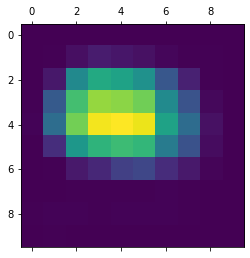

In [28]:
# PROBLEM 5
# This code is referenced in piazza and endorsed by the instructors
# https://canvas.harvard.edu/courses/79842/external_tools/68366
img_path = 'birds.jpg'
img_size = (299, 299)
# Get a model, preprocess the input, and encode
model_builder = keras.applications.xception.Xception
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"
classifier_layer_names = ["avg_pool", "predictions"]

def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, classifier_layer_names):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")

# Print what the top predicted class is
preds = model.predict(img_array)
# print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, classifier_layer_names)

# Display heatmap
plt.matshow(heatmap)

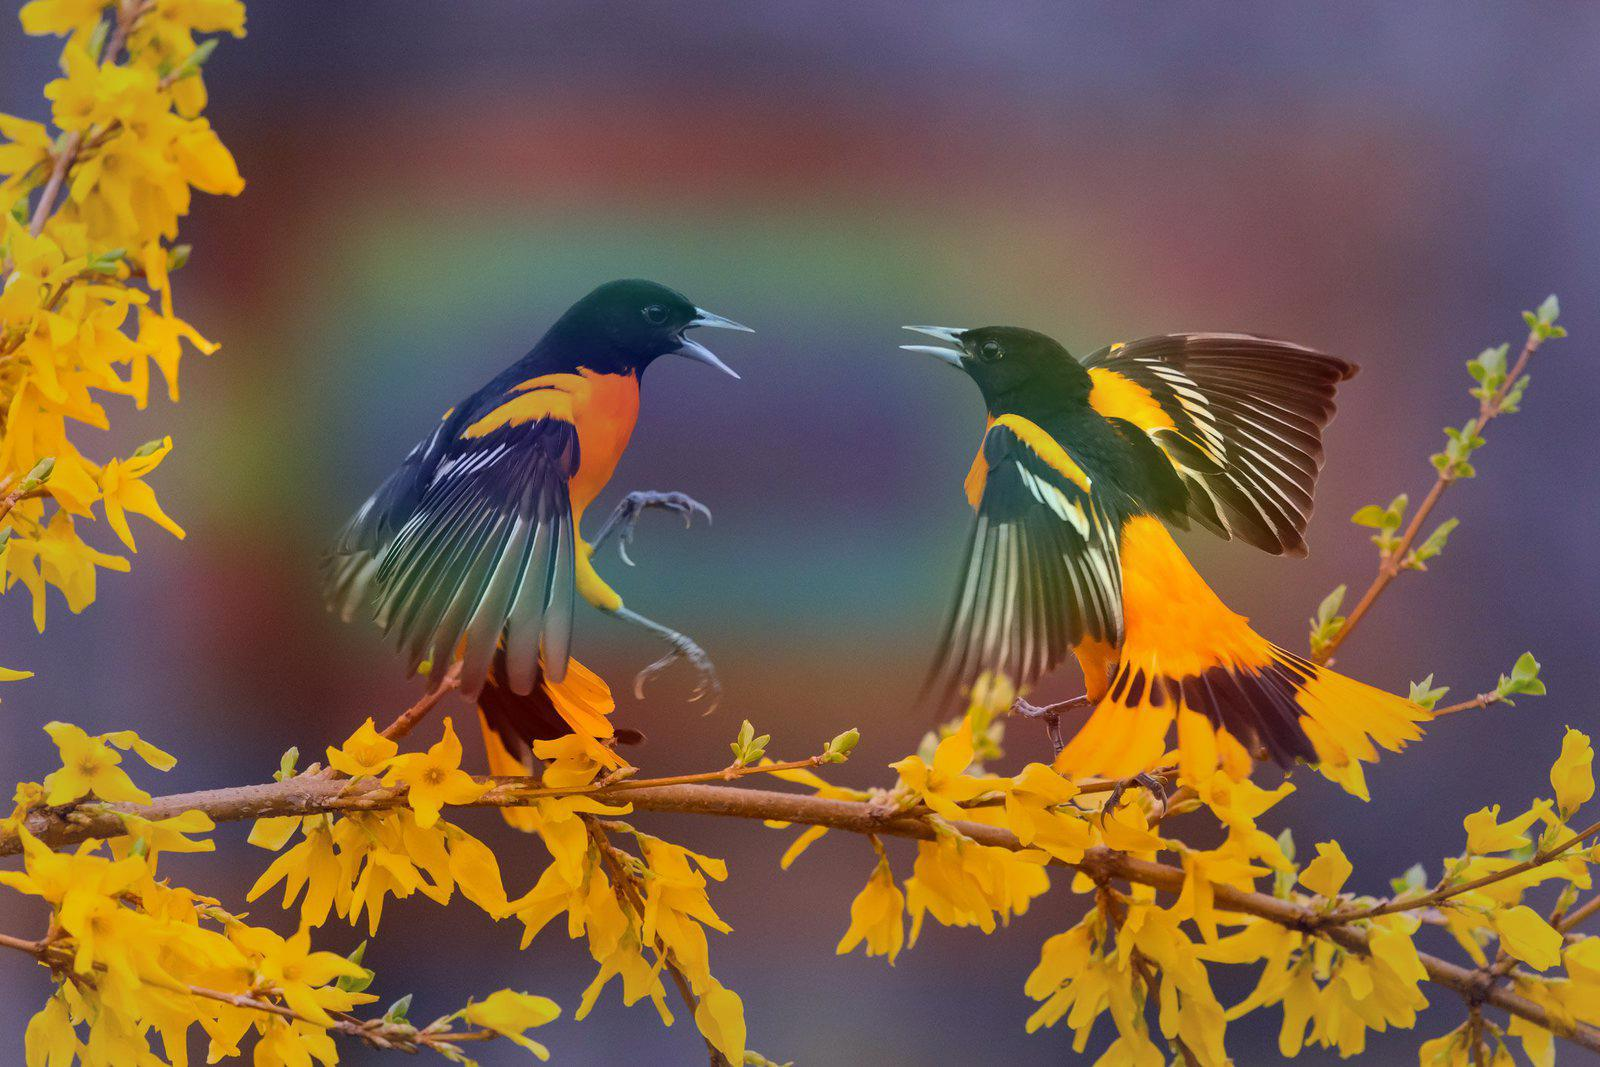

In [30]:
# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
# superimposed_img = jet_heatmap * 0.4 + img
# Using cv2 to do the superimposition
superimposed_img = cv2.addWeighted(jet_heatmap,0.2, img,0.8,0)
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "birds_cam.jpg"
superimposed_img.save(save_path)

# Display Grad CAM
display(Image(save_path))

In [31]:
# I ran deep dream on the birds after tweaking some of the params and got this image. It is in the results folder, as specified in the assignment.
# https://drive.google.com/file/d/1eNUea5Q1QSOXXyxQQAy3bp3NIe0TI_rM/view?usp=sharing